########## NGC ##########


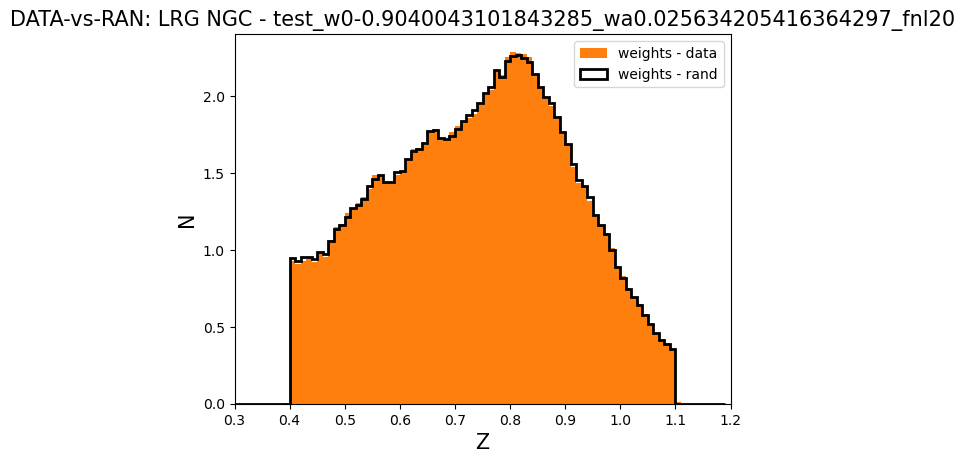

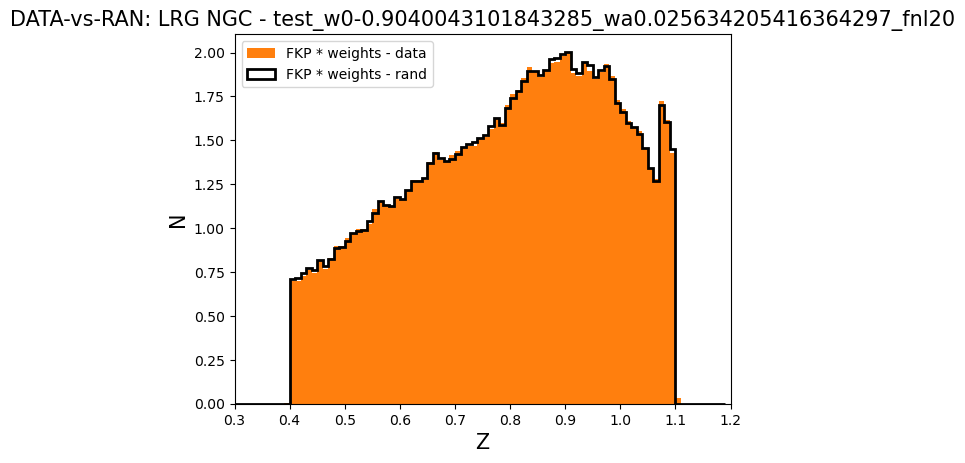

########## SGC ##########


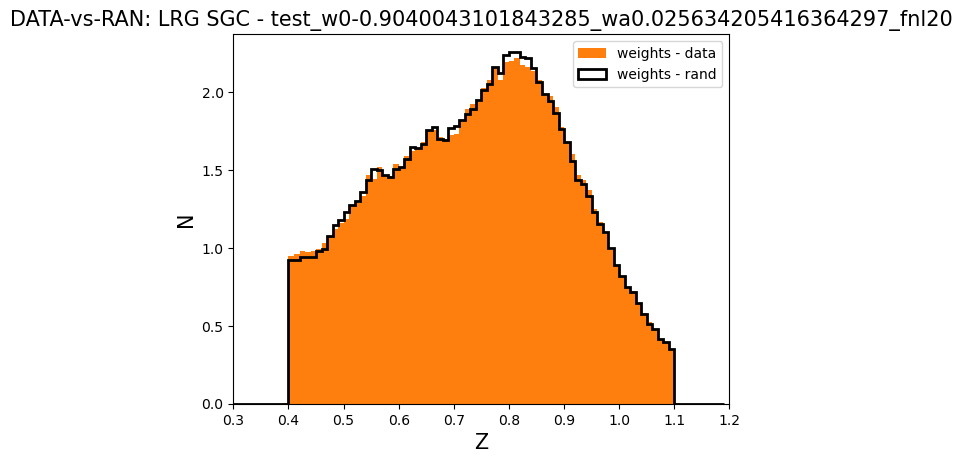

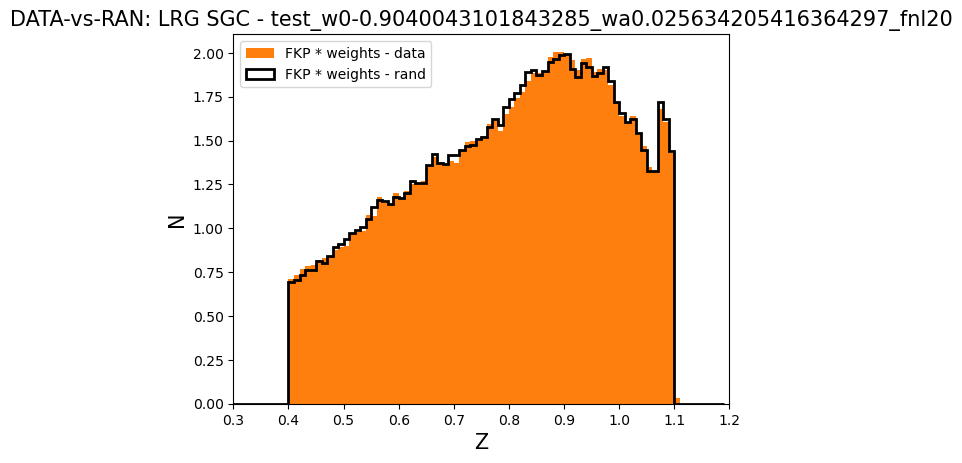

In [1]:
import fitsio
import matplotlib.pyplot as plt

# File paths
file_path_ngc_data = "/global/cfs/cdirs/desi/survey/catalogs/main/mocks/FirstGenMocks/AbacusSummit/Y1/mock1/LSScats/blinded/jmena_fnl/test_w0-0.9040043101843285_wa0.025634205416364297_fnl20/LSScats/blinded/LRG_NGC_clustering.dat.fits"
file_path_sgc_data = "/global/cfs/cdirs/desi/survey/catalogs/main/mocks/FirstGenMocks/AbacusSummit/Y1/mock1/LSScats/blinded/jmena_fnl/test_w0-0.9040043101843285_wa0.025634205416364297_fnl20/LSScats/blinded/LRG_SGC_clustering.dat.fits"

file_path_ngc_ran = "/global/cfs/cdirs/desi/survey/catalogs/main/mocks/FirstGenMocks/AbacusSummit/Y1/mock1/LSScats/blinded/jmena_fnl/test_w0-0.9040043101843285_wa0.025634205416364297_fnl20/LSScats/blinded/LRG_NGC_0_clustering.ran.fits"
file_path_sgc_ran = "/global/cfs/cdirs/desi/survey/catalogs/main/mocks/FirstGenMocks/AbacusSummit/Y1/mock1/LSScats/blinded/jmena_fnl/test_w0-0.9040043101843285_wa0.025634205416364297_fnl20/LSScats/blinded/LRG_SGC_0_clustering.ran.fits"

# Read the catalogs
data_ngc_data = fitsio.read(file_path_ngc_data)
data_sgc_data = fitsio.read(file_path_sgc_data)

data_ngc_ran = fitsio.read(file_path_ngc_ran)
data_sgc_ran = fitsio.read(file_path_sgc_ran)

import numpy as np

# Plotting function
def plot_data(data1, data2, title):
    zmin, zmax = 0.3, 1.2
    bins = np.arange(zmin, zmax, 0.01)
    plt.clf()
    plt.hist(data1['Z'], density=True, weights=data1['WEIGHT'], bins=bins, label='weights - data', color='C1')
    plt.hist(data2['Z'], density=True, weights=data2['WEIGHT'], bins=bins, label='weights - rand', color='k', histtype='step', lw=2)

    plt.title(title, fontsize=15)
    plt.xlabel('Z', fontsize=15)
    plt.ylabel('N', fontsize=15)
    plt.legend()
    plt.xlim(zmin, zmax)
    plt.show()
    
    plt.clf()

    plt.hist(data1['Z'], density=True, weights=data1['WEIGHT']*data1['WEIGHT_FKP'], bins=bins, label='FKP * weights - data', color='C1')
    plt.hist(data2['Z'], histtype='step', lw=2, density=True, weights=data2['WEIGHT']*data2['WEIGHT_FKP'], bins=bins, label='FKP * weights - rand', color='k')

    plt.title(title, fontsize=15)
    plt.xlabel('Z', fontsize=15)
    plt.ylabel('N', fontsize=15)
    plt.legend()
    plt.xlim(zmin, zmax)
    plt.show()

# Plot NGC
print("########## NGC ##########")
plot_data(data_ngc_data, data_ngc_ran, 'DATA-vs-RAN: LRG NGC - test_w0-0.9040043101843285_wa0.025634205416364297_fnl20')

print("########## SGC ##########")
# Plot SGC
plot_data(data_sgc_data, data_sgc_ran, 'DATA-vs-RAN: LRG SGC - test_w0-0.9040043101843285_wa0.025634205416364297_fnl20')
